In [11]:
#Single-qubit quantum gates
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit import transpile
from collections import Counter

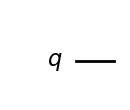

In [27]:
# Preparing the quantum circuit

# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)

# Draw the circuit
qc.draw(output="mpl")

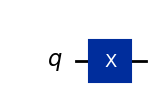

In [28]:
# Apply a X gate to qubit 0
qc.x(0)

qc.draw(output="mpl")

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


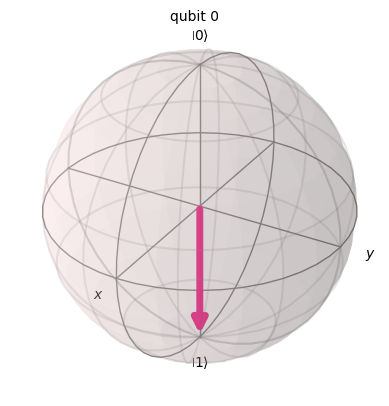

In [29]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

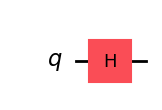

In [30]:
qc = QuantumCircuit(1)

# Apply an Hadamard gate to qubit 0
qc.h(0)

# Draw the circuit
qc.draw(output="mpl")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


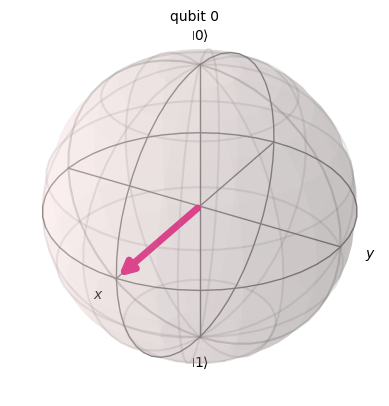

In [31]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

plot_bloch_multivector(out_vector)

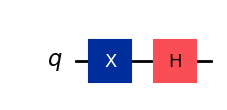

In [32]:
qc = QuantumCircuit(1)

qc.x(0)
qc.h(0)

qc.draw(output="mpl")

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


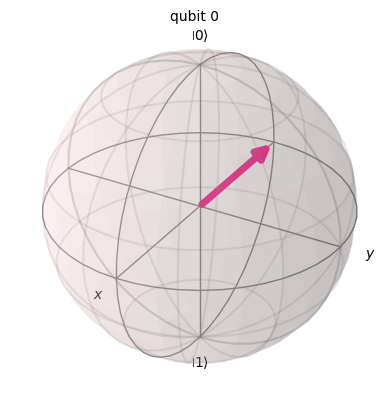

In [33]:
out_vector = Statevector(qc)
print(out_vector)

plot_bloch_multivector(out_vector)

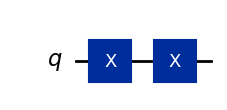

In [34]:
# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)

# Add a X gate to qubit 0
qc.x(0)

# Add a X gate to qubit 0
qc.x(0)

# Draw a circuit
qc.draw(output="mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


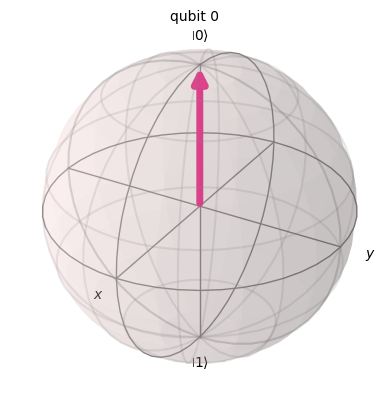

In [35]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

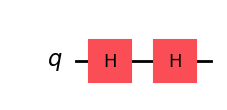

In [36]:
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw("mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


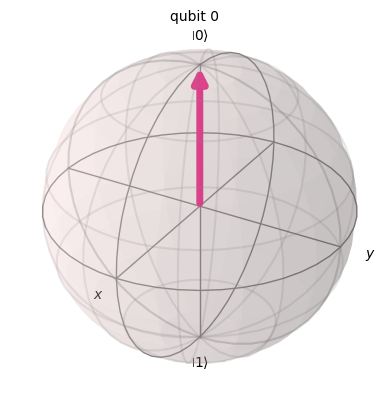

In [37]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

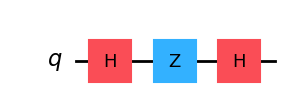

In [38]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw("mpl")

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


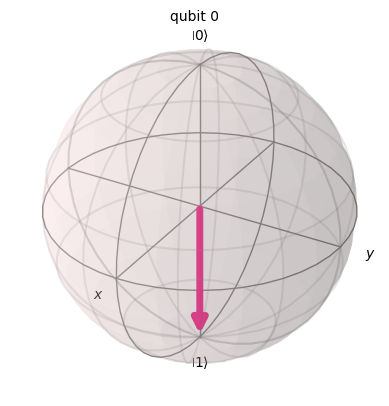

In [39]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

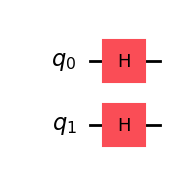

In [40]:
# Create the two qubits quantum circuit
qc = QuantumCircuit(2)

# Apply an H gate to qubit 0
qc.h(0)

# Apply an H gate to qubit 1
qc.h(1)

# Draw the circuit
qc.draw(output="mpl")

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


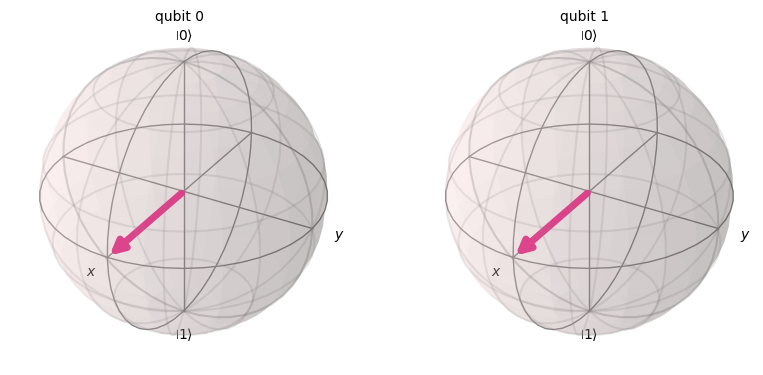

In [41]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)
# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

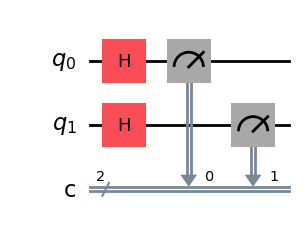

In [94]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.h(1)

qc.measure(0,0)
qc.measure(1,1)

qc.draw(output="mpl")

{'10': 260, '01': 257, '00': 253, '11': 254}


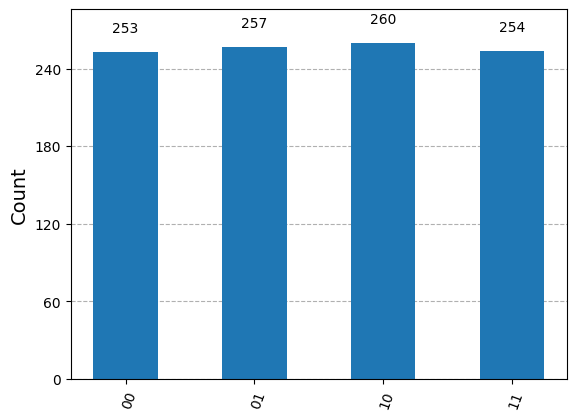

In [98]:
# backend = AerSimulator()

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram( counts )

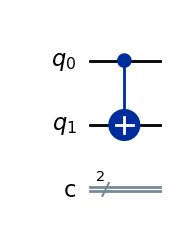

In [79]:
qc = QuantumCircuit(2,2)

# Apply the CNOT (cx) gate to a |00> state.
qc.cx(0,1)

qc.draw(output="mpl")

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


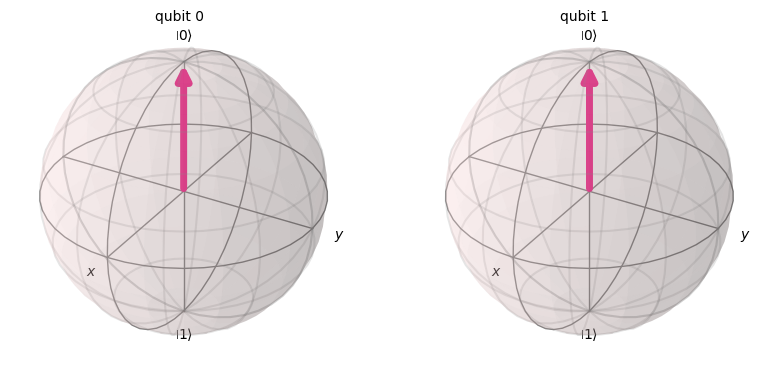

In [83]:
out_vector = Statevector(qc)
print(out_vector)

plot_bloch_multivector(out_vector)

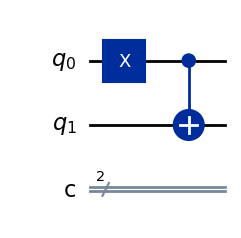

In [99]:
qc = QuantumCircuit(2,2)

qc.x(0)
qc.cx(0,1)

# Draw the circuit
qc.draw(output="mpl")

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


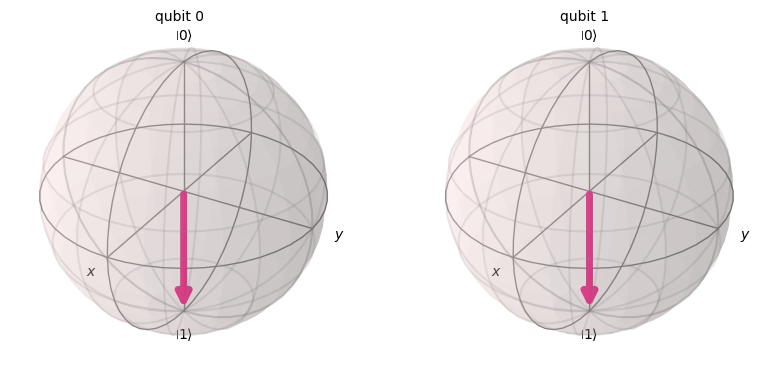

In [90]:
out_vector = Statevector(qc)
print(out_vector)

plot_bloch_multivector(out_vector)

{'00': 1024}


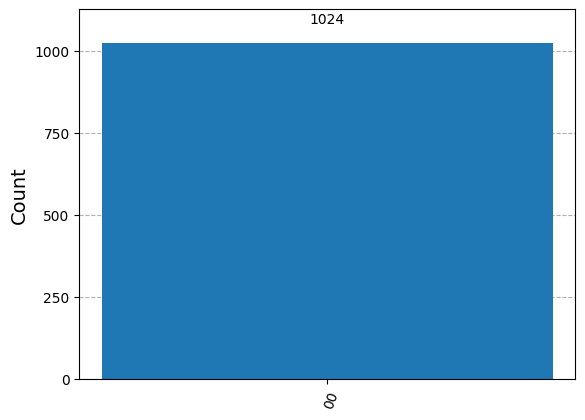

In [92]:
backend = AerSimulator()

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram( counts )

# Run on a real quantum device by following Qiskit Patterns

Let us create a Bell state and run it on a real quantum computer;

$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

Now we will follow the four steps to writing a quantum program, called Qiskit Patterns:

    1. Map the problem to a quantum-native format
    2. Optimize the circuits
    3. Execute the target circuit
    4. Postprocess the results

### Step 1. Map the problem to a quantum-native format

In a quantum program, quantum circuits are the native format in which to represent quantum instructions. When creating a circuit, you'll usually create a new QuantumCircuit object, then add instructions to it in sequence.

The following code cell creates a circuit that produces a Bell state, which is a specific two-qubit entangled state.

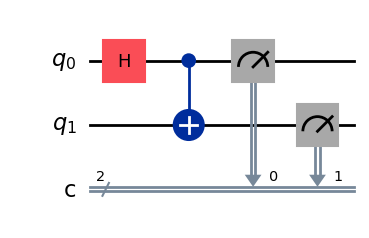

In [100]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.cx(0,1)

qc.measure(0,0)
qc.measure(1,1)

qc.draw("mpl")

### Step 2. Optimize the circuits and operators

Qiskit converts abstract circuits to QISA (Quantum Instruction Set Architecture) circuits that respect the constraints of the target hardware and optimizes circuit performance.  Before the optimization, we will specify the target hardware.

In [123]:
service = QiskitRuntimeService(channel="ibm_quantum")
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [116]:
# You can also identify the least busy device
backend = service.least_busy(operational=True)
print(backend)

<IBMBackend('ibm_brisbane')>


Transpiling the circuit is to compile the circuit optimized for execution on a real machine backend.

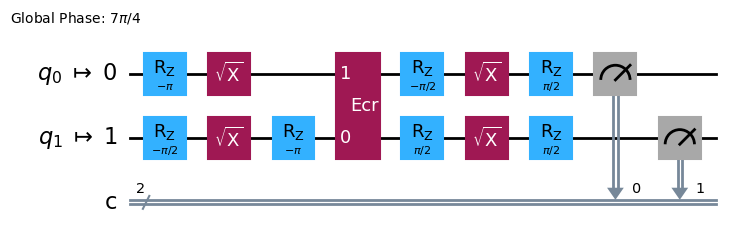

In [131]:
# Transpile the circuit into basis gates exectable on the hardware
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
target_circuit = pm.run(qc)

targer_circuit.draw("mpl", idle_wires=False)

### Step 3. Execute the target circuit

Now, we will run the target circuit on the real device.

In [139]:
samler = Sampler(backend)
job_real = sampler.run([target_circuit])

print("job id:", job_real.job_id())

job id: aa3a6750-43bc-42b8-8f69-90995da40110


In [140]:
# Check the job status
job_real.status()

<JobStatus.DONE: 'job has successfully run'>

In [149]:
# If the Notebook session got disconnected you can also check your job status by running the following code
service = QiskitRuntimeService()
job_real = service.job('aa3a6750-43bc-42b8-8f69-90995da40110')
job_real.status()

RuntimeJobNotFound: 'Job not found: 404 Client Error: Not Found for url: https://api.quantum.ibm.com/runtime/jobs/aa3a6750-43bc-42b8-8f69-90995da40110. {"errors":[{"code":1291,"message":"Job not found. Job ID: aa3a6750-43bc-42b8-8f69-90995da40110","solution":"Verify the job ID is correct, and that you have the correct access permissions.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}'

In [146]:
# Execute after job has successfully run
result_real = job_real.result()
print(result_real[0].data.c.get_counts())

{'11': 497, '00': 527}


### Step 4. Postprocess the results

Finally, we must post-process our results to create outputs in the expected format like values or graphs.

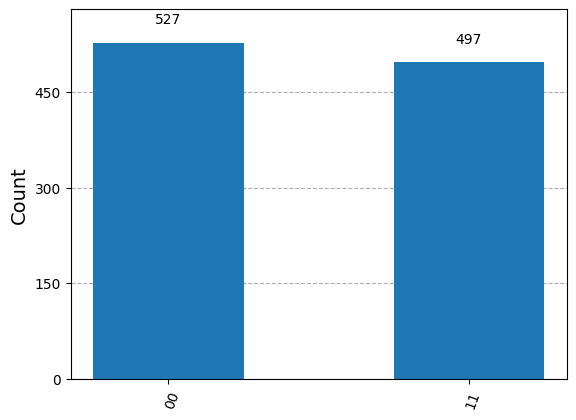

In [148]:
plot_histogram(result_real[0].data.c.get_counts())

## Exercise 2

The GHZ state of the $8$ quantum bits is as follows

$$\frac{1}{\sqrt 2}(|00000000\rangle + |11111111\rangle).$$


Let's create this state with the shallowest circuit. The depth of the shallowest quantum circuit is 5 with the measurement gates combined.

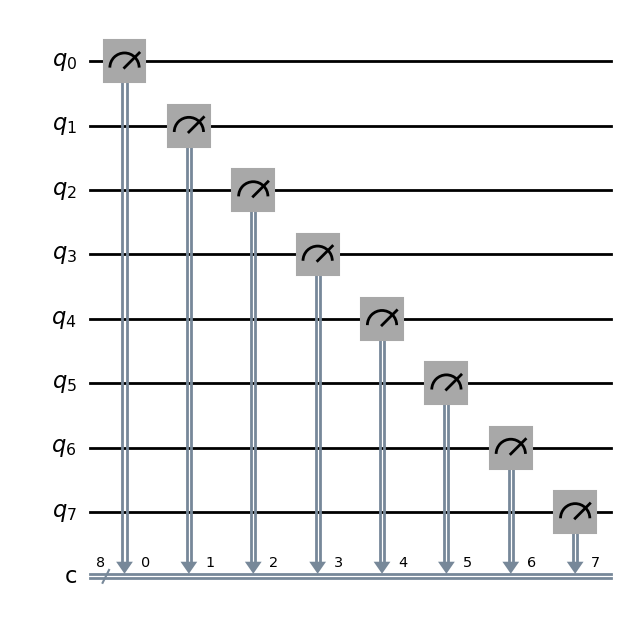

In [5]:
# Step 1: Map the problem to a quantum-native format
qc = QuantumCircuit(8,8)

for i in range(8):
    qc.measure(i,i)

qc.draw("mpl")

In [6]:
print(qc.depth())

1


In [8]:
# Step 2: Optimize the circuits and opetators
# Fot this exercise, the circuit and operators are simple, so no optimizations are needed.

# Step 3: Execute the target circuit
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1024)
result = job.result()

counts = result[0].data.c.get_counts()
print(counts)

{'00000000': 1024}


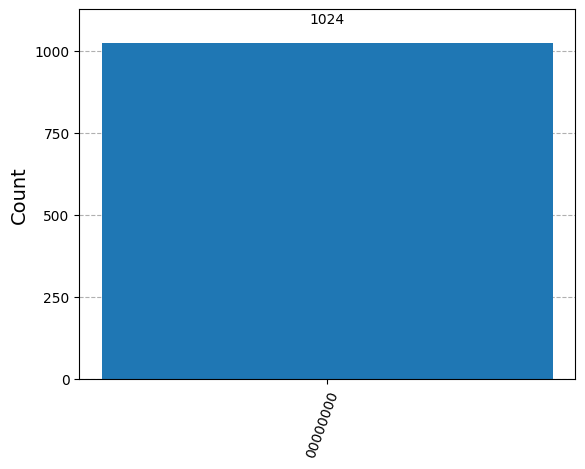

In [13]:
# Step 4: Postprocess the results
plot_histogram(counts)